In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ticktack
from ticktack import fitting
import os
from matplotlib.lines import Line2D
import matplotlib as mpl
mpl.style.use('seaborn-colorblind')

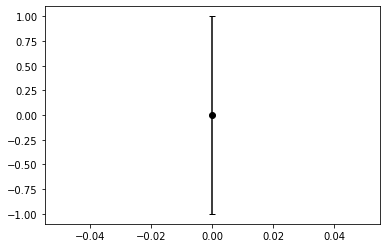

In [2]:
cbm_models = ["Guttler14", "Buntgen18", "Brehm21",]
cbm_names = ["Güttler et al, 2015", "Büntgen et al, 2018", "Brehm et al, 2021"]
colors = mpl.rcParams['axes.prop_cycle'].by_key()['color']
custom_lines = [Line2D([0], [0], color=colors[i], lw=1.5, label=cbm_names[i]) for i in range(len(cbm_models))]
custom_lines.append(plt.errorbar([0], [0], yerr=1, fmt="ok", capsize=3, label="average $\Delta^{14}$C"))
events = ["663BCE", "5259BCE", "775AD-late-N", "5410BCE", "7176BCE"]
titles = ["663BCE", "5259BCE", "775AD Late-Rise", "5410BCE", "7176BCE"]
intervals = [None, 5, None, 5, 5]

def remove_frame_top(ax):
    ax.get_xaxis().set_visible(False);
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

def remove_frame_bot(ax):
    ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)

def remove_frame(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.xaxis.set_ticks([]); ax.yaxis.set_ticks([])
    ax.xaxis.set_ticklabels([]); ax.yaxis.set_ticklabels([])
    
def plot_CP(ax0, ax1, event=None, title=None, interval=None, markersize=6, markersize2=3, capsize=3, elinewidth=3):
    soln_path = ["non-parametric/solutions/{}_{}.npy".format(event, cbm_model) for cbm_model in cbm_models]
    chain_path = ["non-parametric/chain/{}_{}.npy".format(event, cbm_model) for cbm_model in cbm_models]
    fitting.plot_ControlPoints(average_path="data/means/{}.csv".format(event), 
                               soln_path=soln_path,
                               chain_path=chain_path,
                               cbm_models=cbm_models,
                               hemisphere="north",
                               directory_path="data/{}".format(event),
                               labels=False, axs=[ax0, ax1], interval=interval, markersize=markersize, 
                               markersize2=markersize2, capsize=capsize, elinewidth=elinewidth)
    ax0.set_title(title, fontsize=14, fontfamily="serif",fontweight="roman")

In [3]:
def sp_event_775AD(ax0, ax1, title=None, capsize=6, markersize=3, markersize2=3, elinewidth=3):
    events = ["775AD-early-N", "775AD-early-S"]
    hemisphere = ["north", "south"]
    fmts = [["ok", "--k"], ["sk", "-k"]]
    size = 100
    size2 = 30
    
    for i, event in enumerate(events):
        for j, model in enumerate(models):
            cbm = ticktack.load_presaved_model(model, production_rate_units = 'atoms/cm^2/s')
            sf = fitting.SingleFitter(cbm, cbm_model=model, hemisphere=hemisphere[i])
            sf.load_data("data/means/" + event + ".csv")
            sf.compile_production_model(model="control_points")
            soln = np.load("non-parametric/solutions/775AD-early_" + model + ".npy", allow_pickle=True)
            chain = np.load("non-parametric/chain/775AD-early_" + model + ".npy", allow_pickle=True)
            std = np.std(chain, axis=0)
            
            ax0.plot(sf.time_data_fine, sf.dc14_fine(soln), color=colors[j])
            ax1.plot(sf.control_points_time, soln, "o", color=colors[j], markersize=markersize2)
            ax1.plot(sf.control_points_time, soln, color=colors[j])
            ax1.fill_between(sf.control_points_time, soln + std, soln - std, color=colors[j], alpha=0.3,
                             edgecolor="none")

        ax0.errorbar(sf.time_data + sf.time_offset, sf.d14c_data, yerr=sf.d14c_data_error, fmt=fmts[i][0], capsize=capsize,
                     markersize=markersize, elinewidth=elinewidth, label="average $\Delta^{14}$C", alpha=1)
        ax0.plot(sf.time_data + sf.time_offset, sf.d14c_data, fmts[i][1], alpha=1)
        file_names = [f for f in os.listdir("data/" + event) if os.path.isfile(os.path.join("data/" + event, f))]
        for file in file_names:
            sf.load_data("data/" + event + '/' + file)
            ax0.errorbar(sf.time_data + sf.time_offset, sf.d14c_data, fmt="o", color="gray", yerr=sf.d14c_data_error, capsize=3,
                         alpha=0.2)
    ax0.set_title(title, fontsize=14, fontfamily="serif",fontweight="roman")
    ax1.set_xlim(sf.start-0.2, sf.end+0.2);

In [4]:
def sp_event_993AD(ax0, ax1, title=None, sp_event=None, capsize=6, markersize=3, markersize2=3, elinewidth=3):
    events = ["993AD-N", "993AD-S"]
    hemisphere = ["north", "south"]
    fmts = [["ok", "--k"], ["sk", "-k"]]
    size = 100
    size2 = 30

    for i, event in enumerate(events):
        for j, model in enumerate(models):
            cbm = ticktack.load_presaved_model(model, production_rate_units = 'atoms/cm^2/s')
            sf = fitting.SingleFitter(cbm, cbm_model=model, hemisphere=hemisphere[i])
            sf.load_data("data/means/" + event + ".csv")
            sf.compile_production_model(model="control_points")
            soln = np.load("non-parametric/solutions/993AD_" + model + ".npy", allow_pickle=True)
            chain = np.load("non-parametric/chain/993AD_" + model + ".npy", allow_pickle=True)
            
            if event == "993AD-N":
                time_data = sf.time_data
                time_data_fine = sf.time_data_fine
                control_points_time = sf.control_points_time
                annual = sf.annual
                start = sf.start
                end = sf.end
            if event == "993AD-S":
                sf.time_data = time_data
                sf.time_data_fine = time_data_fine
                sf.control_points_time = control_points_time
                sf.annual = annual
            
            std = np.std(chain, axis=0)
            ax0.plot(sf.time_data_fine, sf.dc14_fine(soln), color=colors[j])
            ax1.plot(sf.control_points_time, soln, "o", color=colors[j], markersize=markersize2)
            ax1.plot(sf.control_points_time, soln, color=colors[j])
            ax1.fill_between(sf.control_points_time, soln + std, soln - std, color=colors[j], alpha=0.3,
                             edgecolor="none")
        sf.load_data("data/means/" + event + ".csv")
        ax0.errorbar(sf.time_data + sf.time_offset, sf.d14c_data, yerr=sf.d14c_data_error, fmt=fmts[i][0], capsize=capsize,
                     markersize=markersize, elinewidth=elinewidth, label="average $\Delta^{14}$C", alpha=1)
        ax0.plot(sf.time_data + sf.time_offset, sf.d14c_data, fmts[i][1], alpha=1)
        file_names = [f for f in os.listdir("data/" + event) if os.path.isfile(os.path.join("data/" + event, f))]
        for file in file_names:
            sf.load_data("data/" + event + '/' + file)
            ax0.errorbar(sf.time_data + sf.time_offset, sf.d14c_data, fmt="o", color="gray", yerr=sf.d14c_data_error, capsize=3,
                         alpha=0.2)
    ax0.set_title(title, fontsize=14, fontfamily="serif",fontweight="roman")
    ax1.set_xlim(start-0.2, end+0.2);

/tmp/ipykernel_30739/4268135722.py:3: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace=0.15)
INFO[2022-02-04 17:24:13,271]: Unable to initialize backend 'tpu_driver': Not found: Unable to find driver in registry given worker: 
INFO[2022-02-04 17:24:13,272]: Unable to initialize backend 'gpu': Not found: Could not find registered platform with name: "cuda". Available platform names are: Interpreter Host
INFO[2022-02-04 17:24:13,272]: Unable to initialize backend 'tpu': Invalid argument: TpuPlatform is not available.
WARNING[2022-02-04 17:24:13,273]: No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


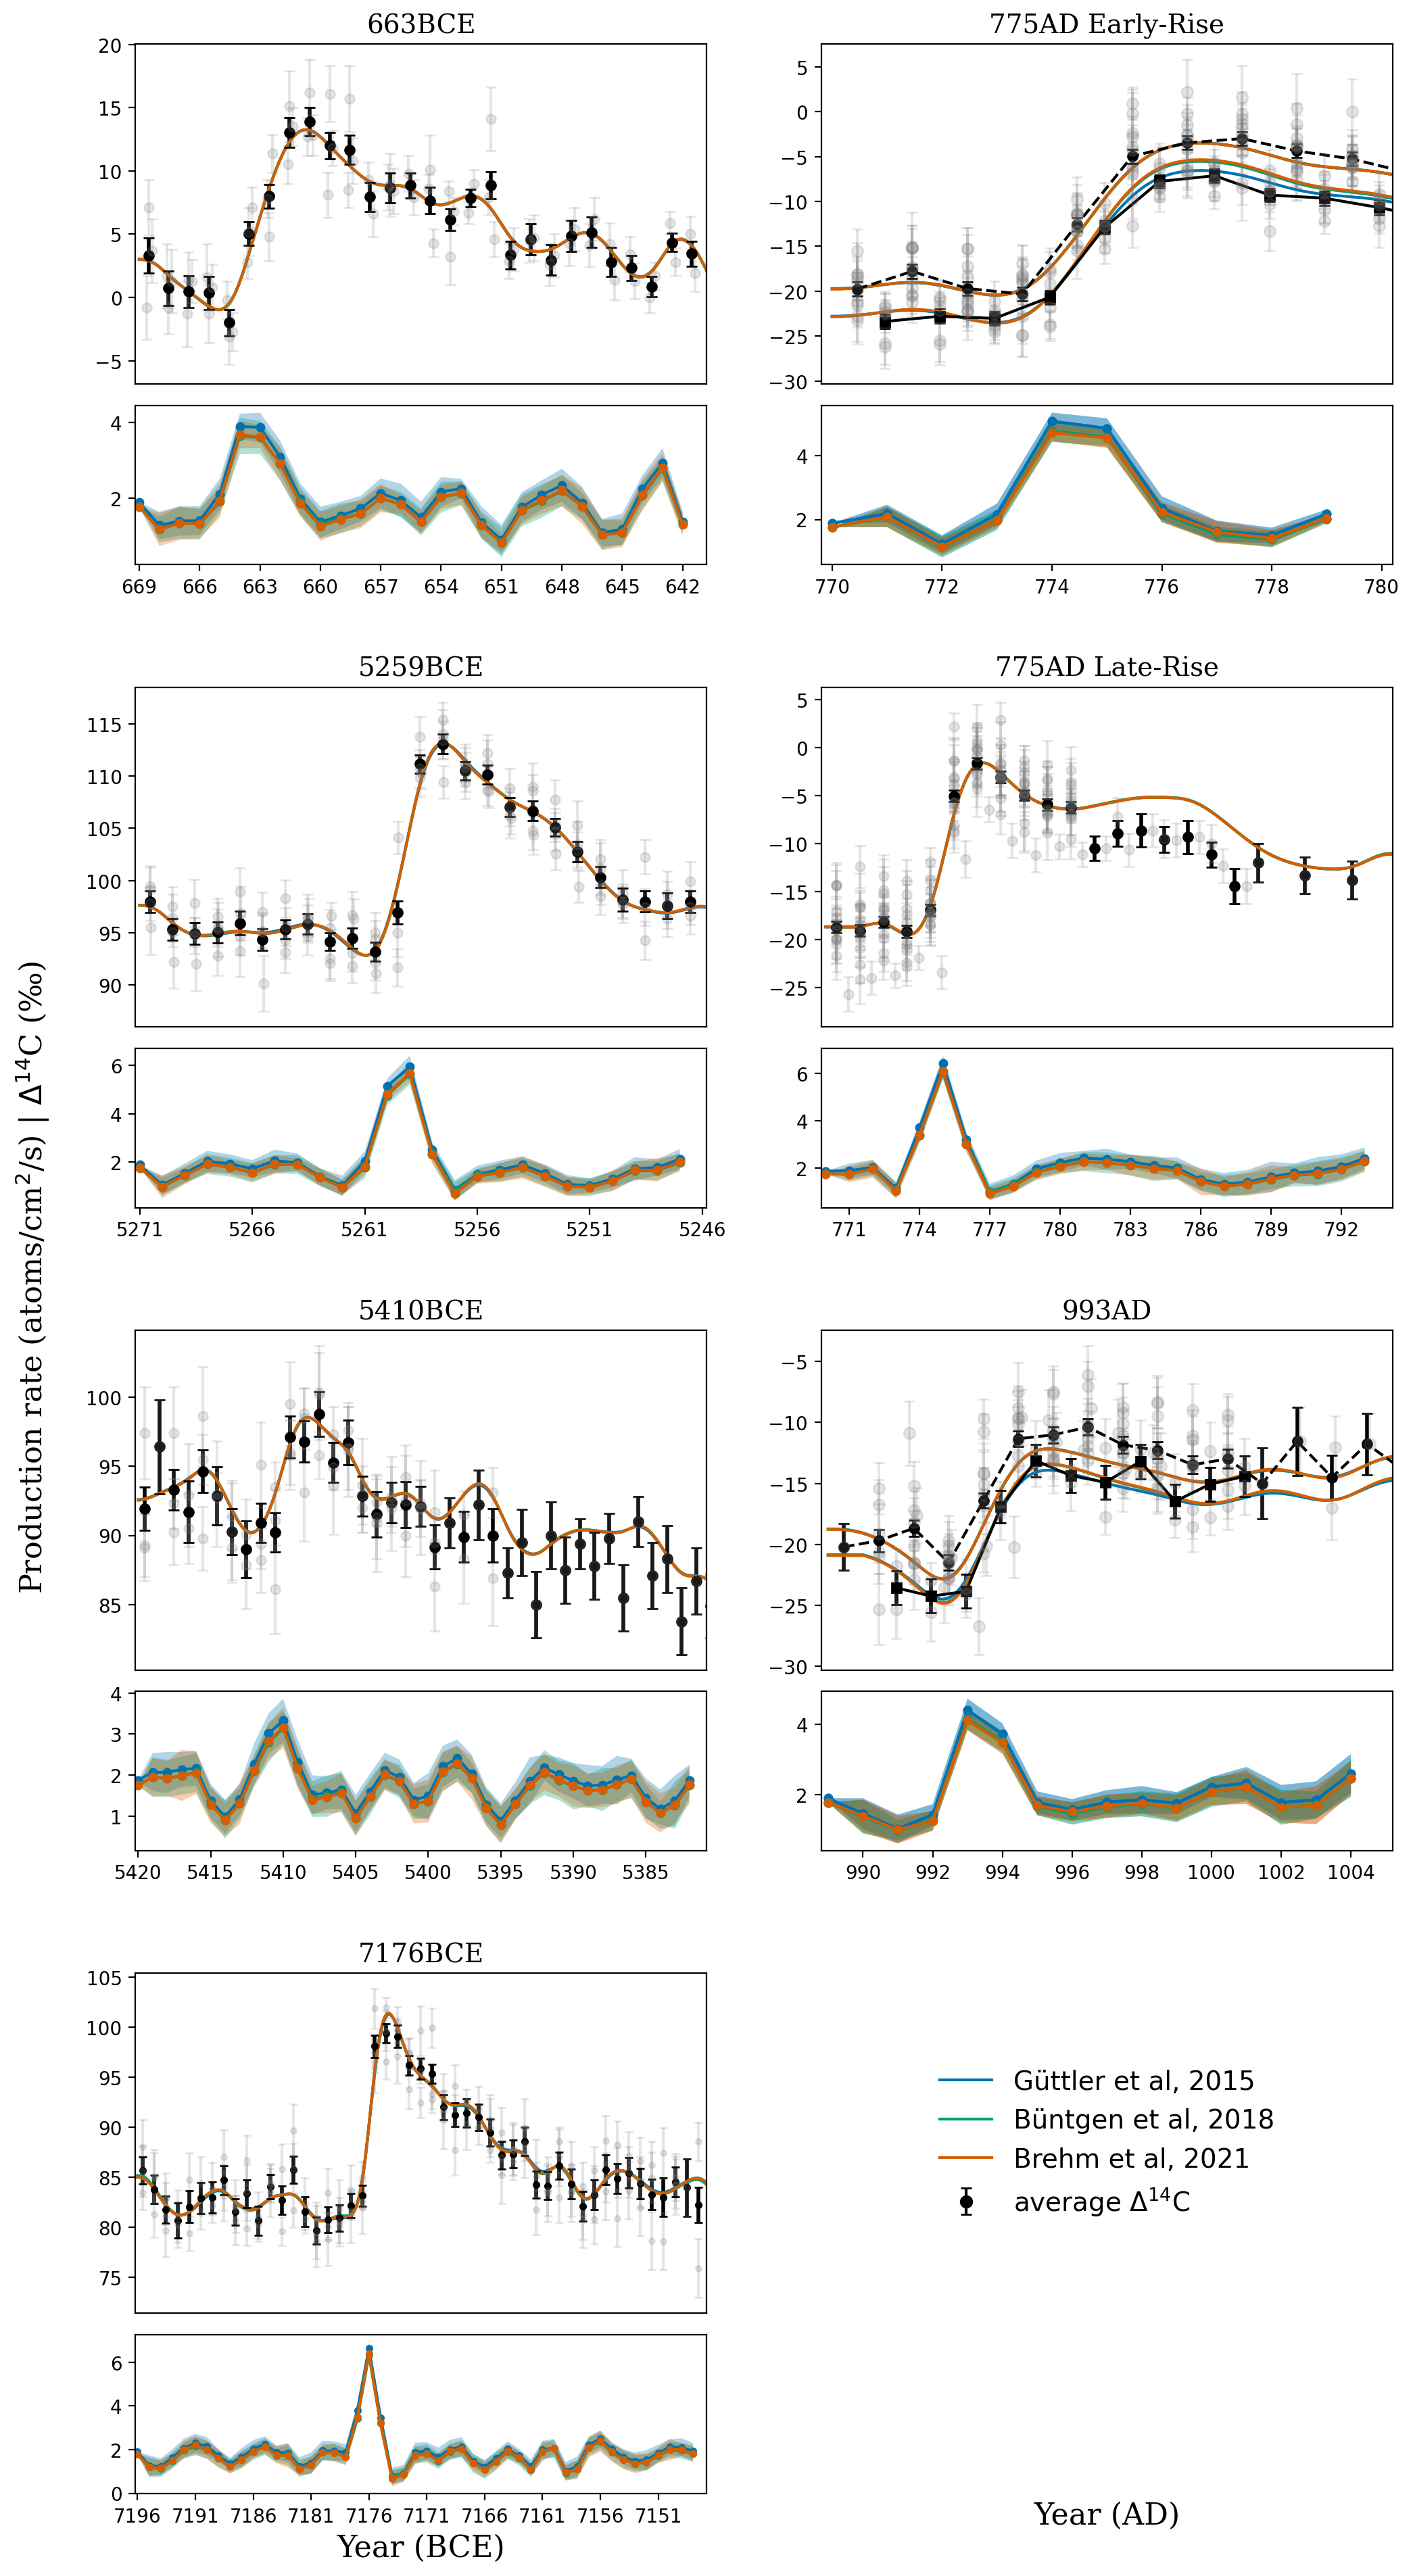

In [5]:
models = ["Guttler14", "Brehm21", "Buntgen18"]
fig = plt.figure(figsize=(12, 24), dpi=200, constrained_layout=True)
fig.subplots_adjust(hspace=0.15)
spec = fig.add_gridspec(ncols=2, nrows=15, height_ratios=[1, 1, 1, 0.5] * 3 + [1, 1, 1])

# left 1
ax0 = fig.add_subplot(spec[0:2, 0])
ax1 = fig.add_subplot(spec[2, 0], sharex=ax0)
ax0.xaxis.set_visible(False);
# remove_frame_top(ax0); remove_frame_bot(ax1);

# right 1
ax2 = fig.add_subplot(spec[0:2, 1])
ax3 = fig.add_subplot(spec[2, 1], sharex=ax2)
ax2.xaxis.set_visible(False);
# remove_frame_top(ax2); remove_frame_bot(ax3);

# invisible block
fig.add_subplot(spec[3, :]).set_visible(False)

# second row
ax4 = fig.add_subplot(spec[4:6, 0])
ax5 = fig.add_subplot(spec[6, 0], sharex=ax4)
ax4.xaxis.set_visible(False);
# remove_frame_top(ax4); remove_frame_bot(ax5);

ax6 = fig.add_subplot(spec[4:6, 1])
ax7 = fig.add_subplot(spec[6, 1], sharex=ax6)
ax6.xaxis.set_visible(False);
# remove_frame_top(ax6); remove_frame_bot(ax7);

# invisible
fig.add_subplot(spec[7, :]).set_visible(False)

# third row
ax8 = fig.add_subplot(spec[8:10, 0])
ax9 = fig.add_subplot(spec[10, 0], sharex=ax8)
ax8.xaxis.set_visible(False);
# remove_frame_top(ax8); remove_frame_bot(ax9);

ax10 = fig.add_subplot(spec[8:10, 1])
ax11 = fig.add_subplot(spec[10, 1], sharex=ax10)
ax10.xaxis.set_visible(False);
# remove_frame_top(ax10); remove_frame_bot(ax11);

# invisible
fig.add_subplot(spec[11, :]).set_visible(False)

# fourth row
ax12 = fig.add_subplot(spec[12:14, 0])
ax13 = fig.add_subplot(spec[14, 0], sharex=ax12)
ax12.xaxis.set_visible(False);
# remove_frame_top(ax12); remove_frame_bot(ax13);

ax14 = fig.add_subplot(spec[12:14, 1])
ax15 = fig.add_subplot(spec[14, 1], sharex=ax14)
ax14.legend(handles=custom_lines, frameon=False, loc="center", fontsize=14);
ax14.axis("off")
remove_frame(ax15)

# sup
ax13.set_xlabel("Year (BCE)", fontsize=16, fontfamily="serif", fontweight="roman")
ax15.set_xlabel("Year (AD)", fontsize=16, fontfamily="serif", fontweight="roman")
# fig.supxlabel("CE", x=0.75, y=0.1, va="top", fontsize=16, fontfamily="serif", fontweight="roman");
# fig.supxlabel("BCE", x=0.25, y=0.1, va="top", fontsize=16, fontfamily="serif", fontweight="roman");
# fig.suptitle("Samples", x=0.5, y=0.9, va="baseline", fontsize=24, fontfamily="serif", fontweight="roman");
fig.supylabel("Production rate (atoms/cm$^2$/s) | $\Delta^{14}$C (‰)", x=0.05, y=0.5, 
              fontsize=16, fontfamily="serif", fontweight="roman");

# add plots
axs = [(ax0, ax1), (ax4, ax5), (ax6, ax7), (ax8, ax9), (ax12, ax13)]
sp_event_775AD(ax2, ax3, title="775AD Early-Rise", markersize=5, markersize2=4, capsize=3, elinewidth=2)
sp_event_993AD(ax10, ax11, title="993AD", markersize=5, markersize2=4, capsize=3, elinewidth=2)
for i, ax in enumerate(axs):
    if events[i] == "7176BCE":
            plot_CP(ax[0], ax[1], event=events[i], title=titles[i], interval=intervals[i], markersize=3, 
                    markersize2=3, capsize=2, elinewidth=2)
    else:
        plot_CP(ax[0], ax[1], event=events[i], title=titles[i], interval=intervals[i], markersize=5, 
                markersize2=4, capsize=3, elinewidth=2)
fig.savefig("control-points.jpg", bbox_inches='tight')

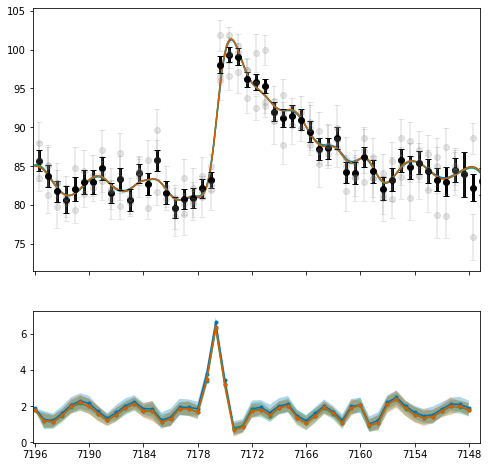

In [7]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})
soln_path = ["non-parametric/solutions/{}_{}.npy".format("7176BCE", cbm_model) for cbm_model in cbm_models]
chain_path = ["non-parametric/chain/{}_{}.npy".format("7176BCE", cbm_model) for cbm_model in cbm_models]
fitting.plot_ControlPoints(average_path="data/means/{}.csv".format("7176BCE"), 
                           soln_path=soln_path,
                           chain_path=chain_path,
                           cbm_models=cbm_models,
                           hemisphere="north",
                           directory_path="data/{}".format("7176BCE"),
                           labels=False, axs=[ax1, ax2], interval=6)